<a href="https://colab.research.google.com/github/remziyeer/XAI/blob/main/ml_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb

sklearn ile iris veri kümesini ekle 

In [21]:
iris=datasets.load_iris()

Taç yaprağın uzunluğunu ve genişliğini kullanıyoruz

In [19]:
X = iris.data[:,[2,3]]
y = iris.target

iris_dataframe = pd.DataFrame(X, columns=iris.feature_names[2:])
print(iris_dataframe.head())

   petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2


Eğitim ve Test Veri Kümeleri

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

print("Eğitim Örneği: {}".format(X_train.shape[0]))
print("Test Örneği: {}".format(X_test.shape[0]))

Eğitim Örneği: 105
Test Örneği: 45


Şimdi verileri sklearn kullanarak ölçeklendireceğiz.

In [24]:
sc = StandardScaler()
sc.fit(X_train)

X_train_ = sc.transform(X_train)
X_test_ = sc.transform(X_test)

Sonra özelliklerimizi standartlaştıracağız. 



In [25]:
print(pd.DataFrame(X_train_, columns=iris_dataframe.columns).head())


   petal length (cm)  petal width (cm)
0          -0.182950         -0.293181
1           0.930661          0.737246
2           1.042022          1.638870
3           0.652258          0.350836
4           1.097702          0.737246


Şimdi matplotlib ile grafik çizimi

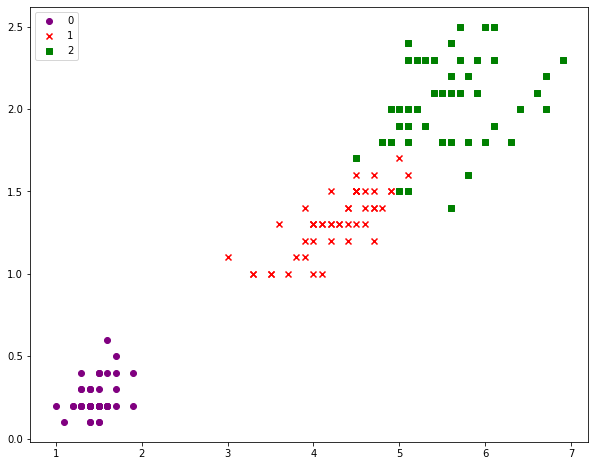

In [38]:
markers = ("o","x","s")
colors = ("purple","red","green")
cmap = ListedColormap(colors[:len(np.unique(y_test))])
plt.figure(figsize=(10,8))
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y ==cl, 0],y=X[y==cl,1],c=cmap(idx),marker=markers[idx],label=cl)
    plt.legend()
plt.show()

In [66]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    plt.figure(figsize=(10,8))
    markers = ("o", "x", "s")
    colors = ('purple', 'orange', 'turquoise')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
        plt.legend()
    plt.show()

K Değerine Karşı Hata Oranı

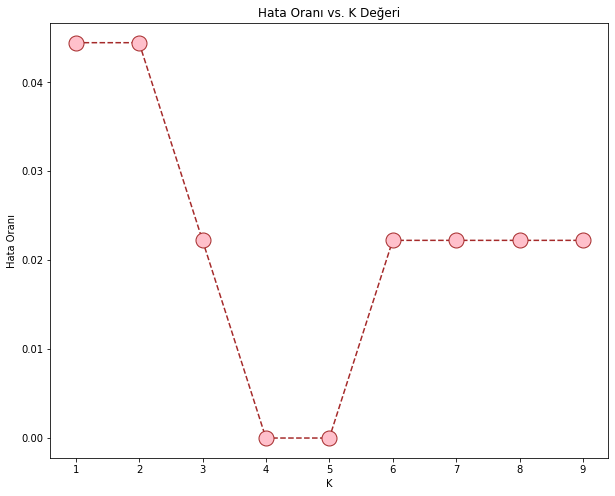

In [53]:
error_rate = []

for i in range(1,10):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_, y_train)
    pred_i = knn.predict(X_test_)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,8))
plt.plot(range(1,10),error_rate,color='brown', linestyle='dashed', marker='o',
         markerfacecolor='pink', markersize=15)
plt.title('Hata Oranı vs. K Değeri')
plt.xlabel('K')
plt.ylabel('Hata Oranı')
plt.show()
plt.close()

#KNN sınıflandırıcı


In [69]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_, y_train)

print ("Train - Doğruluğu :", metrics.accuracy_score(y_train, knn.predict(X_train_)))
print ("Train - Karışıklık Matrisi :",metrics.confusion_matrix(y_train, knn.predict(X_train_)))
print ("Train - Sınıflandırma Raporu:", metrics.classification_report(y_train, knn.predict(X_train_)))
print("\n")
print ("Test - Doğruluğu :", metrics.accuracy_score(y_test, knn.predict(X_test_)))
print ("Test - Karışıklık Matrisi :",metrics.confusion_matrix(y_test, knn.predict(X_test_)))
print ("Test - Sınıflandırma Raporu :", metrics.classification_report(y_test, knn.predict(X_test_)))


Train - Doğruluğu : 0.9523809523809523
Train - Karışıklık Matrisi : [[34  0  0]
 [ 0 30  2]
 [ 0  3 36]]
Train - Sınıflandırma Raporu:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.91      0.94      0.92        32
           2       0.95      0.92      0.94        39

    accuracy                           0.95       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.95      0.95      0.95       105



Test - Doğruluğu : 1.0
Test - Karışıklık Matrisi : [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
Test - Sınıflandırma Raporu :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00     

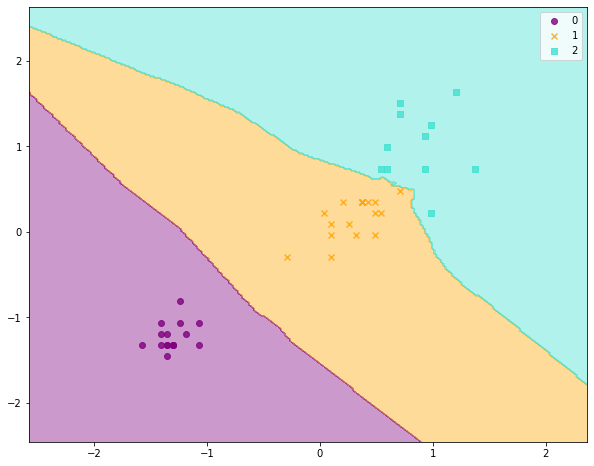

In [67]:
plot_decision_regions(X_test_, y_test, knn)

Logistic Regression

In [68]:
LReg = LogisticRegression()
LReg.fit(X_train_, y_train)

LogisticRegression()

#Değerlendirme matrisleri oluşturma

In [72]:
print ("Train - Doğruluğu :", metrics.accuracy_score(y_train, LReg.predict(X_train_)))
print ("Train - Karışıklık Matrisi :",metrics.confusion_matrix(y_train, LReg.predict(X_train_)))
print ("Train - Sınıflandırma Raporu :", metrics.classification_report(y_train, LReg.predict(X_train_)))
print("\n")
print ("Test - Doğruluğu :", metrics.accuracy_score(y_test, LReg.predict(X_test_)))
print ("Test - Karışıklık Matrisi :",metrics.confusion_matrix(y_test, LReg.predict(X_test_)))
print ("Test - Sınıflandırma Raporu :", metrics.classification_report(y_test, LReg.predict(X_test_)))

Train - Doğruluğu : 0.9523809523809523
Train - Karışıklık Matrisi : [[34  0  0]
 [ 0 30  2]
 [ 0  3 36]]
Train - Sınıflandırma Raporu :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.91      0.94      0.92        32
           2       0.95      0.92      0.94        39

    accuracy                           0.95       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.95      0.95      0.95       105



Test - Doğruluğu : 0.9555555555555556
Test - Karışıklık Matrisi : [[16  0  0]
 [ 0 17  1]
 [ 0  1 10]]
Test - Sınıflandırma Raporu :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      0.94      0.94        18
           2       0.91      0.91      0.91        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.9

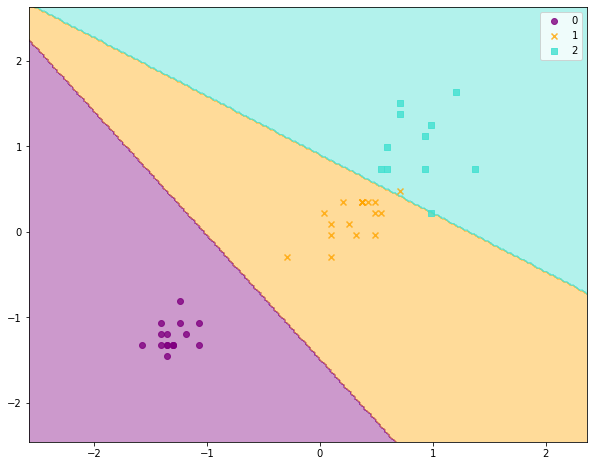

In [73]:
plot_decision_regions(X_test_, y_test, LReg)


#Naive Bayes

In [75]:
NB = GaussianNB()
NB.fit(X_train_, y_train)

print ("Train - Doğruluğu :", metrics.accuracy_score(y_train, NB.predict(X_train_)))
print ("Train - Karışıklık Matrisi :",metrics.confusion_matrix(y_train, NB.predict(X_train_)))
print ("Train - Sınıflandırma Raporu :", metrics.classification_report(y_train, NB.predict(X_train_)))
print("\n")
print ("Test - Doğruluğu :", metrics.accuracy_score(y_test, NB.predict(X_test_)))
print ("Test - Karışıklık Matrisi :",metrics.confusion_matrix(y_test, NB.predict(X_test_)))
print ("Test - Sınıflandırma raporu :", metrics.classification_report(y_test, NB.predict(X_test_)))

Train - Doğruluğu : 0.9523809523809523
Train - Karışıklık Matrisi : [[34  0  0]
 [ 0 30  2]
 [ 0  3 36]]
Train - Sınıflandırma Raporu :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.91      0.94      0.92        32
           2       0.95      0.92      0.94        39

    accuracy                           0.95       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.95      0.95      0.95       105



Test - Doğruluğu : 0.9777777777777777
Test - Karışıklık Matrisi : [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test - Sınıflandırma raporu :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.9

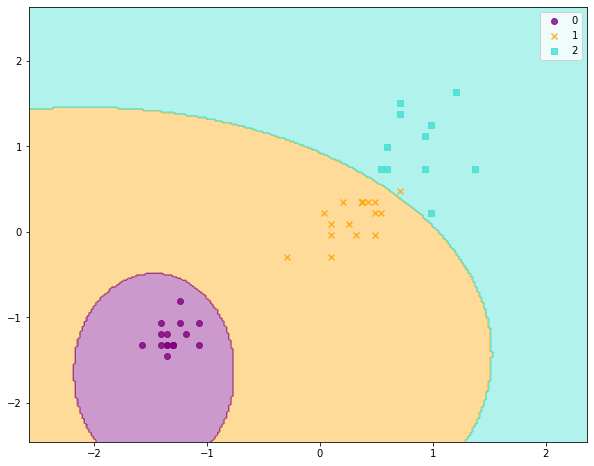

In [76]:
plot_decision_regions(X_test_, y_test, NB)


# Linear SVM


In [78]:
svm = SVC(kernel="linear", random_state=0,gamma=0.1,C=1.0)
svm.fit(X_train_, y_train)

print ("Train - Doğruluğu :", metrics.accuracy_score(y_train, svm.predict(X_train_)))
print ("Train - Karışıklık Matrisi :",metrics.confusion_matrix(y_train, svm.predict(X_train_)))
print ("Train - Sınıflandırma Raporu :", metrics.classification_report(y_train, svm.predict(X_train_)))
print("\n")
print ("Test - Doğruluğu :", metrics.accuracy_score(y_test, svm.predict(X_test_)))
print ("Test - Karışıklık Matrisi :",metrics.confusion_matrix(y_test, svm.predict(X_test_)))
print ("Test - Sınıflandırma Raporu :", metrics.classification_report(y_test, svm.predict(X_test_)))

Train - Doğruluğu : 0.9523809523809523
Train - Karışıklık Matrisi : [[34  0  0]
 [ 0 30  2]
 [ 0  3 36]]
Train - Sınıflandırma Raporu :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.91      0.94      0.92        32
           2       0.95      0.92      0.94        39

    accuracy                           0.95       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.95      0.95      0.95       105



Test - Doğruluğu : 0.9777777777777777
Test - Karışıklık Matrisi : [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test - Sınıflandırma Raporu :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.9

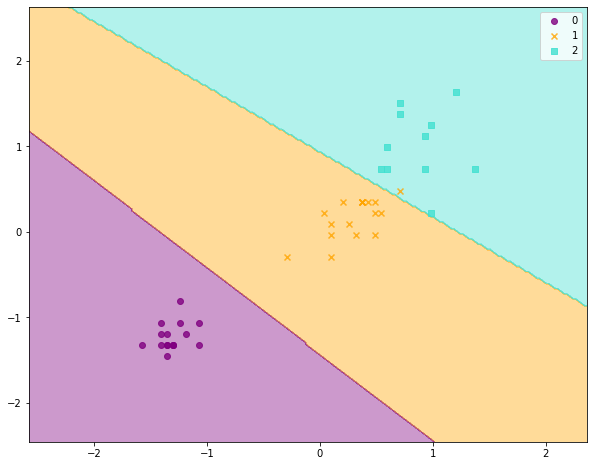

In [79]:
plot_decision_regions(X_test_,y_test,svm)


# XGBoost classifier


In [82]:
xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(X_train_, y_train)

print ("Train - Doğruluğu :", metrics.accuracy_score(y_train, xgb_clf.predict(X_train_)))
print ("Train - Karışıklık Matrisi :",metrics.confusion_matrix(y_train, xgb_clf.predict(X_train_)))
print ("Train - Sınıflandırma Raporu :", metrics.classification_report(y_train, xgb_clf.predict(X_train_)))
print("\n")
print ("Test - Doğruluğu :", metrics.accuracy_score(y_test, xgb_clf.predict(X_test_)))
print ("Test - Karışıklık Matrisi :",metrics.confusion_matrix(y_test, xgb_clf.predict(X_test_)))
print ("Test - Sınıflandırma Raporu :", metrics.classification_report(y_test, xgb_clf.predict(X_test_)))

Train - Doğruluğu : 0.9809523809523809
Train - Karışıklık Matrisi : [[34  0  0]
 [ 0 30  2]
 [ 0  0 39]]
Train - Sınıflandırma Raporu :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      0.94      0.97        32
           2       0.95      1.00      0.97        39

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105



Test - Doğruluğu : 0.9777777777777777
Test - Karışıklık Matrisi : [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test - Sınıflandırma Raporu :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.9

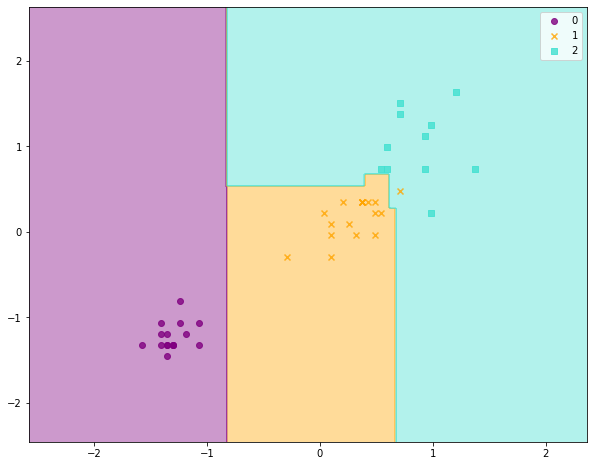

In [83]:
plot_decision_regions(X_test_, y_test, xgb_clf)